In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### links
Fetching Quandl API [link](https://blog.quandl.com/api-for-commodity-data) <br>
CHRIS index dataset [link](https://www.quandl.com/data/CHRIS-Wiki-Continuous-Futures/documentation/introduction)

## Load list of Futures and apply Market Filter
###### understanding the data structure hierachy
### Commodity index-database
- CHRIS_metadata.csv
    - contains all 600 futures from all markets
    - ~4000 rows ~8 for each future
    
### Market-filter
- we choose CME (chicaco mercantile exchange)
- filter by desired market to get all cme 

In [2]:
path="./data/"
# load metadata about futures
chris_meta=pd.read_csv(path+"CHRIS_metadata.csv")

# Filter for market
EXCHANGE="CME"
chris_meta=chris_meta[chris_meta["code"].str.contains(EXCHANGE)]
chris_meta.head(100)

,code,name,description,refreshed_at,from_date,to_date
73,CME_0D1,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
74,CME_0D2,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
75,CME_0D3,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
76,CME_0D4,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
77,CME_0D5,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
78,CME_0F1,Mini Singapore Fuel Oil 180 cst (Platts) Futur...,Historical Futures Prices: Mini Singapore Fuel...,2018-11-22 03:29:44,2014-02-18,2018-11-21
79,CME_0F2,Mini Singapore Fuel Oil 180 cst (Platts) Futur...,Historical Futures Prices: Mini Singapore Fuel...,2018-11-22 03:29:44,2014-02-18,2018-11-21
80,CME_1N1,"Singapore Mogas 92 Unleaded (Platts) Futures, ...",Historical Futures Prices: Singapore Mogas 92 ...,2018-11-22 03:29:49,2014-02-18,2018-11-21
81,CME_1N2,"Singapore Mogas 92 Unleaded (Platts) Futures, ...",Historical Futures Prices: Singapore Mogas 92 ...,2018-11-22 03:29:49,2014-02-18,2018-11-21
82,CME_1N3,"Singapore Mogas 92 Unleaded (Platts) Futures, ...",Historical Futures Prices: Singapore Mogas 92 ...,2018-11-22 03:29:49,2014-02-18,2018-11-21


## Filter commodities using regular expression
As we can see every future consists of multiple sub-codes 
We apply regex to only receive only one desired future (the first)

In [3]:
# apply regex to filter unique futures
regex_="\D*[0-9]*\D+(0|[2-9])*1$"
chris_meta = chris_meta[chris_meta["code"].str.match(regex_)]
futures_to_fetch=chris_meta["code"]
futures_to_fetch_list=futures_to_fetch.tolist()

In [4]:
print("Furutes count: ",len(futures_to_fetch_list))

Furutes count:  405


## Fetch from Quandl & Save to .csv

CHRIS/ + future + .column
- .0 Date
- .1 Open
- .2 High
- .3 Low
- .4 Last
- .5 Change
- .6 Settle
- .7 Volume
- .8 Previous Day Open Interest

In [5]:
import quandl
API_KEY_JOE="16-3ue4hzwtKNj3DSFYY"
quandl.ApiConfig.api_key=API_KEY_JOE

#CHRIS/{EXCHANGE}_{CODE}{NUMBER}
CHRIS="CHRIS/"
COL_=".4"
time_range=["daily","weekly","monthly","quarterly","annual"]

def fetch_chris_from_quandl():
    sample_futures = futures_to_fetch_list[0:]
    sample_futures=[CHRIS + f + COL_ for f in sample_futures]
    df_commodities = quandl.get(sample_futures, collapse=time_range[0])
    return df_commodities

#fetch_chris_from_quandl = df_commodities.to_csv(path+EXCHANGE+"_commodities.csv")

## Loading

In [6]:
df_commodities = pd.read_csv(path+EXCHANGE+"_commodities.csv", index_col=0)
df_commodities.iloc[:,:]

,CHRIS/CME_0D1 - Last,CHRIS/CME_0F1 - Last,CHRIS/CME_1N1 - Last,CHRIS/CME_1NB1 - Last,CHRIS/CME_1R1 - Last,CHRIS/CME_1U1 - Last,CHRIS/CME_461 - Last,CHRIS/CME_471 - Last,CHRIS/CME_4L1 - Last,CHRIS/CME_4M1 - Last,...,CHRIS/CME_YC1 - Last,CHRIS/CME_YH1 - Last,CHRIS/CME_YK1 - Last,CHRIS/CME_YM1 - Last,CHRIS/CME_YW1 - Last,CHRIS/CME_YX1 - Last,CHRIS/CME_Z1 - Last,CHRIS/CME_Z91 - Last,CHRIS/CME_Z921 - Last,CHRIS/CME_Z931 - Last
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting NaN Values

In [38]:
def get_Total_NaN_of_df(df):
    return df.isna().sum().sum()

def missingValues(df, from_=0, percentage=False):
    # nan percentage
    if percentage:
        count_nulls = df.isnull().sum(axis=1)/len(df.columns)
    else:
        count_nulls = df.isnull().sum(axis=1)
    plt.figure(figsize=((20,10)));
    plt.xticks([0,2000,4000,6000,8000,9000,10000,11000,12000,13000,14000,15000])
    count_nulls[from_:].plot(subplots=True, label='NaN Values')
    plt.legend()
    plt.xticks(rotation=25)
    plt.ylabel('percentage of nan values')
    plt.show()
    print("NaNs in df: ", get_Total_NaN_of_df(df))

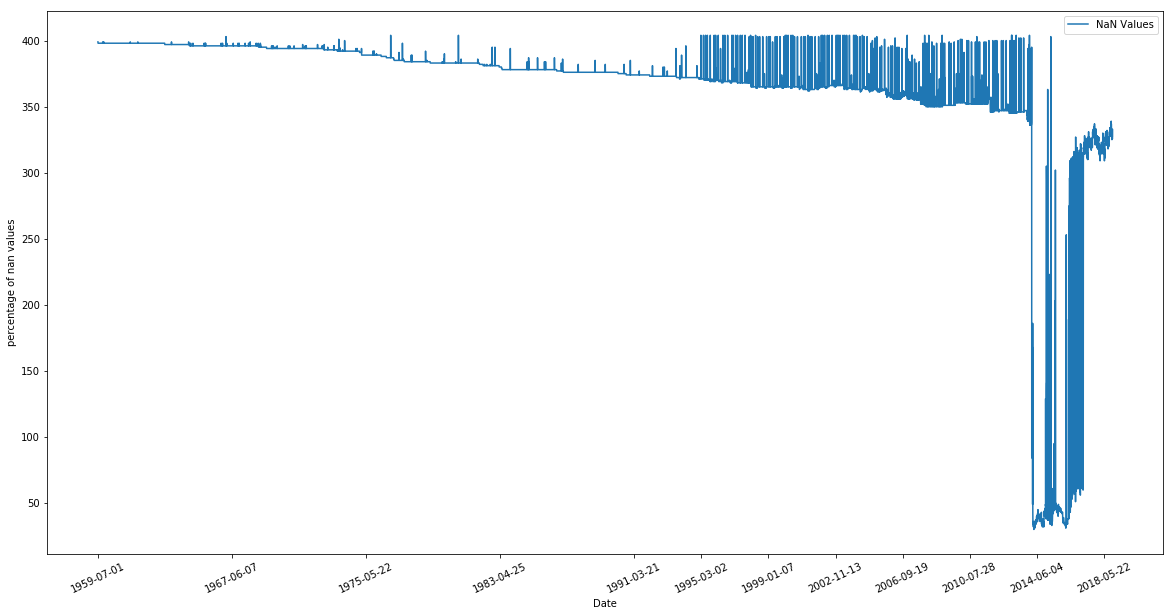

NaNs in df:  5462276


In [37]:
missingValues(df_commodities, 0, percentage=False)

In [25]:
# choose df wil less nans -> from 12k has lowest nans
df_filtered_cms = df_commodities[13920:]

In [35]:
# returns df without nan values for a specific asset
def find_biggest_full_frame(asset_, df):
    # filter only rows that are not null
    target_asset_notnull = df[asset_].notnull()
    # apply filter
    df_w_clean_target = df[target_asset_notnull]
    # define maximum allowed nan values per asset
    nan_count_tresh = 0
    # filter only rows that have less than the nan_count_tresh nan's
    mask_mean_nan_cols = df_w_clean_target.isnull().sum(axis=0) <= nan_count_tresh
    # apply filter on dataframe
    df_w_clean_target = df_w_clean_target.loc[:, (df_w_clean_target.isnull().sum(axis=0) <= mask_mean_nan_cols)]
    return df_w_clean_target


# choose a prefered stock in which we measure
asset_="CHRIS/CME_AD1 - Last"
df_new = find_biggest_full_frame(asset_, df_filtered_cms)
print("nans for: ",asset_, " = ", get_Total_NaN_of_df(df_new))
df_new

nans for:  CHRIS/CME_AD1 - Last  =  0


,CHRIS/CME_AD1 - Last,CHRIS/CME_BP1 - Last,CHRIS/CME_C1 - Last,CHRIS/CME_CL1 - Last,CHRIS/CME_ED21 - Last,CHRIS/CME_ES1 - Last,CHRIS/CME_LC1 - Last,CHRIS/CME_MD1 - Last,CHRIS/CME_RU1 - Last,CHRIS/CME_S1 - Last,CHRIS/CME_SF1 - Last,CHRIS/CME_TU1 - Last
Date,,,,,,,,,,,,
2014-02-10,0.8924,1.6400,443.00,100.06,96.185,1794.75,141.500,1308.2,28770.0,1325.50,1.1152,110.140620
2014-02-11,0.9016,1.6445,441.50,99.94,96.120,1813.50,142.800,1321.8,28770.0,1334.75,1.1137,110.101560
2014-02-12,0.9012,1.6593,440.00,100.37,96.060,1817.00,142.100,1330.7,28700.0,1323.00,1.1109,110.070310
2014-02-13,0.8971,1.6651,440.50,100.35,96.150,1824.25,143.150,1339.1,28470.0,1344.25,1.1185,110.125000
2014-02-14,0.9018,1.6739,445.25,100.30,96.125,1835.00,142.600,1344.6,28470.0,1337.50,1.1218,110.125000
2014-02-18,0.9017,1.6680,449.40,102.43,96.840,1837.50,143.750,1353.4,28300.0,1362.40,1.1259,110.156250
2014-02-19,0.8988,1.6694,454.60,103.31,96.800,1826.25,143.900,1343.6,27810.0,1354.00,1.1263,110.171875
2014-02-20,0.8984,1.6657,456.20,103.05,96.775,1836.00,144.600,1353.9,27820.0,1358.40,1.1247,110.117190
2014-02-21,0.8959,1.6643,452.20,102.20,96.810,1834.00,144.550,1355.0,28080.0,1372.00,1.1276,110.132810


In [36]:
for commodity_ in filtered_df.columns:
    xx = find_biggest_full_frame(commodity_, filtered_df)
    print("commodity: ",commodity_, " has data for: " ,xx.shape[0], " days and ", xx.shape[1], " commodities")

commodity:  CHRIS/CME_0D1 - Last  has data for:  643  days and  47  commodities
commodity:  CHRIS/CME_0F1 - Last  has data for:  635  days and  41  commodities
commodity:  CHRIS/CME_1N1 - Last  has data for:  647  days and  30  commodities
commodity:  CHRIS/CME_1NB1 - Last  has data for:  631  days and  37  commodities
commodity:  CHRIS/CME_1R1 - Last  has data for:  639  days and  33  commodities
commodity:  CHRIS/CME_1U1 - Last  has data for:  390  days and  119  commodities
commodity:  CHRIS/CME_461 - Last  has data for:  649  days and  29  commodities
commodity:  CHRIS/CME_471 - Last  has data for:  474  days and  49  commodities
commodity:  CHRIS/CME_4L1 - Last  has data for:  647  days and  37  commodities
commodity:  CHRIS/CME_4M1 - Last  has data for:  634  days and  30  commodities
commodity:  CHRIS/CME_4N1 - Last  has data for:  448  days and  178  commodities
commodity:  CHRIS/CME_4P1 - Last  has data for:  651  days and  26  commodities
commodity:  CHRIS/CME_581 - Last  has

commodity:  CHRIS/CME_ES1 - Last  has data for:  1209  days and  8  commodities
commodity:  CHRIS/CME_EW1 - Last  has data for:  644  days and  50  commodities
commodity:  CHRIS/CME_EY1 - Last  has data for:  587  days and  18  commodities
commodity:  CHRIS/CME_F21 - Last  has data for:  649  days and  32  commodities
commodity:  CHRIS/CME_F221 - Last  has data for:  649  days and  31  commodities
commodity:  CHRIS/CME_F231 - Last  has data for:  492  days and  46  commodities
commodity:  CHRIS/CME_F51 - Last  has data for:  649  days and  28  commodities
commodity:  CHRIS/CME_F521 - Last  has data for:  290  days and  60  commodities
commodity:  CHRIS/CME_FC1 - Last  has data for:  1189  days and  16  commodities
commodity:  CHRIS/CME_FDM1 - Last  has data for:  219  days and  103  commodities
commodity:  CHRIS/CME_FF1 - Last  has data for:  824  days and  19  commodities
commodity:  CHRIS/CME_FF21 - Last  has data for:  809  days and  19  commodities
commodity:  CHRIS/CME_FH1 - Last 

commodity:  CHRIS/CME_M6B1 - Last  has data for:  674  days and  31  commodities
commodity:  CHRIS/CME_M6E1 - Last  has data for:  735  days and  28  commodities
commodity:  CHRIS/CME_MBE1 - Last  has data for:  633  days and  31  commodities
commodity:  CHRIS/CME_MBN1 - Last  has data for:  629  days and  45  commodities
commodity:  CHRIS/CME_MCC1 - Last  has data for:  636  days and  44  commodities
commodity:  CHRIS/CME_MD1 - Last  has data for:  1208  days and  12  commodities
commodity:  CHRIS/CME_ME1 - Last  has data for:  643  days and  29  commodities
commodity:  CHRIS/CME_MEL1 - Last  has data for:  31  days and  358  commodities
commodity:  CHRIS/CME_MEO1 - Last  has data for:  640  days and  52  commodities
commodity:  CHRIS/CME_MF1 - Last  has data for:  643  days and  37  commodities
commodity:  CHRIS/CME_MFF1 - Last  has data for:  648  days and  35  commodities
commodity:  CHRIS/CME_MFF21 - Last  has data for:  649  days and  28  commodities
commodity:  CHRIS/CME_MG1 - L

commodity:  CHRIS/CME_RR1 - Last  has data for:  1149  days and  17  commodities
commodity:  CHRIS/CME_RU1 - Last  has data for:  1209  days and  2  commodities
commodity:  CHRIS/CME_RV1 - Last  has data for:  529  days and  2  commodities
commodity:  CHRIS/CME_RY1 - Last  has data for:  1197  days and  17  commodities
commodity:  CHRIS/CME_S1 - Last  has data for:  1209  days and  8  commodities
commodity:  CHRIS/CME_S41 - Last  has data for:  612  days and  38  commodities
commodity:  CHRIS/CME_SA1 - Last  has data for:  692  days and  19  commodities
commodity:  CHRIS/CME_SD1 - Last  has data for:  635  days and  34  commodities
commodity:  CHRIS/CME_SE1 - Last  has data for:  644  days and  40  commodities
commodity:  CHRIS/CME_SF1 - Last  has data for:  1208  days and  12  commodities
commodity:  CHRIS/CME_SG1 - Last  has data for:  640  days and  35  commodities
commodity:  CHRIS/CME_SI1 - Last  has data for:  1187  days and  10  commodities
commodity:  CHRIS/CME_SM1 - Last  has 

## Select one Sample Future & Plot

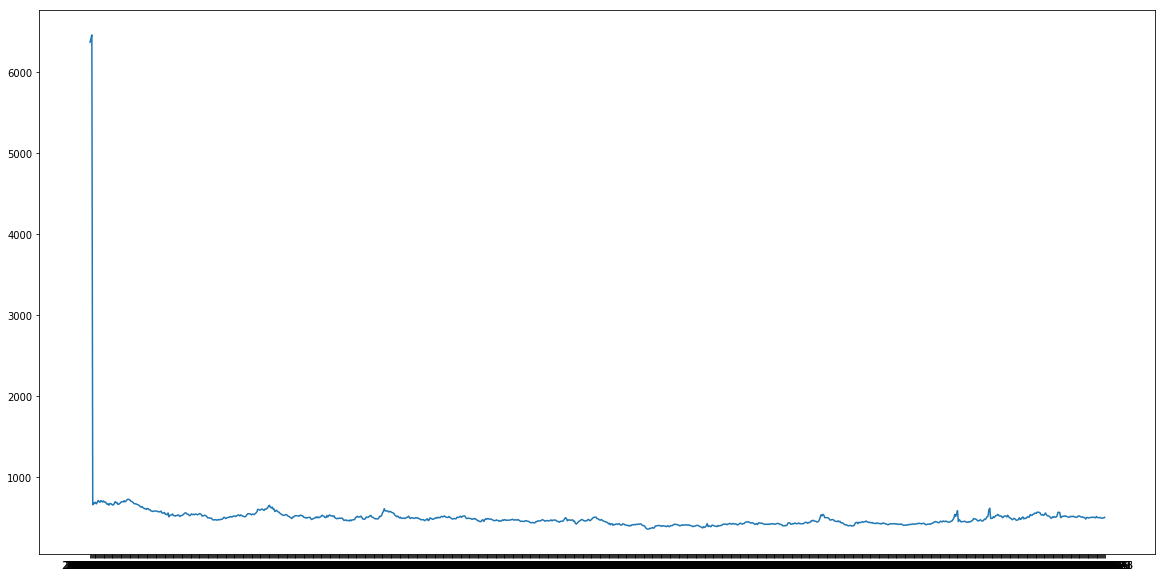

In [21]:
# comma error
future_ = "CHRIS/CME_YW1 - Last"
sel = df_commodities[df_commodities[future_].notnull()]

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(sel[future_])
plt.show()

### TODO
watch out for 
- one null" values!
- comma error


- calc log returns
- clip eigenvalues to sort if necessary
- rolling


    - dont drop any columns because they are considered to be duplicates 
    - example wheat_A wheat_X -> are still independent and different

### clustering algorithms
- louvre 
- k-means + cross validatiion

